<a href="https://colab.research.google.com/github/khan-habibullah/clustring/blob/main/anomaly_detection_using_auto_encoders_unlabeled_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("/content/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data=df.drop(['Class'], axis=1)

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [7]:
train_size = int(0.8 * len(scaled_data))
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [8]:
input_dim = train_data.shape[1]
encoding_dim = 32  # Choose the number of neurons in the hidden layer
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='relu')(encoder_layer)
autoencoder = Model(inputs=input_layer, outputs=decoder_layer)

In [9]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0781
Epoch 2/50
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0484
Epoch 3/50
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0101
Epoch 4/50
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0042
Epoch 5/50
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0042
Epoch 6/50
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0041
Epoch 7/50
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0041
Epoch 8/50
7121/7121 [==============================] - 15s 2ms/step - loss: 0.0041
Epoch 9/50
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0041
Epoch 10/50
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0041
Epoch 11/50
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0041
Epoch 12/50
7121/7121 [==============================] - 12s 2ms/step - lo

In [10]:
reconstructed_data = autoencoder.predict(test_data)

1781/1781 [==============================] - 2s 1ms/step


In [11]:
reconstruction_errors = np.mean(np.square(test_data - reconstructed_data), axis=1)


In [12]:
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)


In [13]:
anomalous_samples = test_data[reconstruction_errors > threshold]


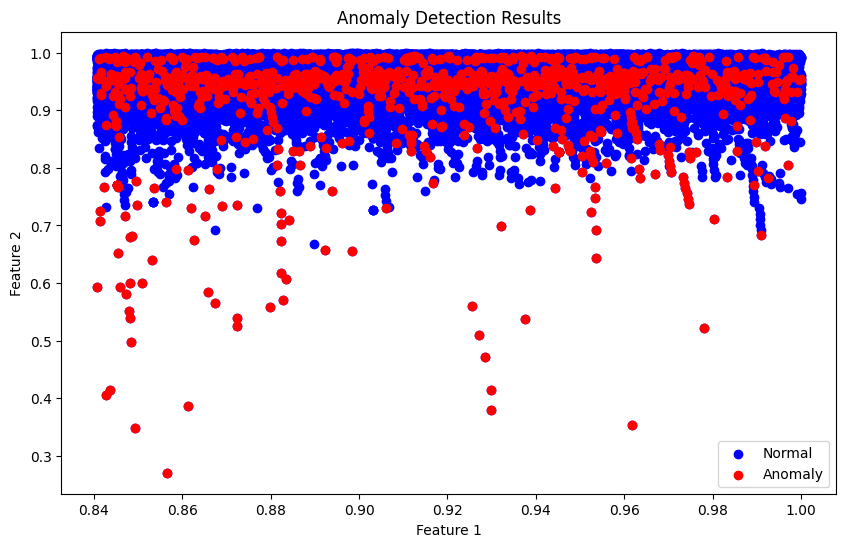

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(test_data[:, 0], test_data[:, 1], color='b', label='Normal')
plt.scatter(anomalous_samples[:, 0], anomalous_samples[:, 1], color='r', label='Anomaly')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Anomaly Detection Results')
plt.show()